# Implementing Decession Tree Algorithm on Classification Problem 

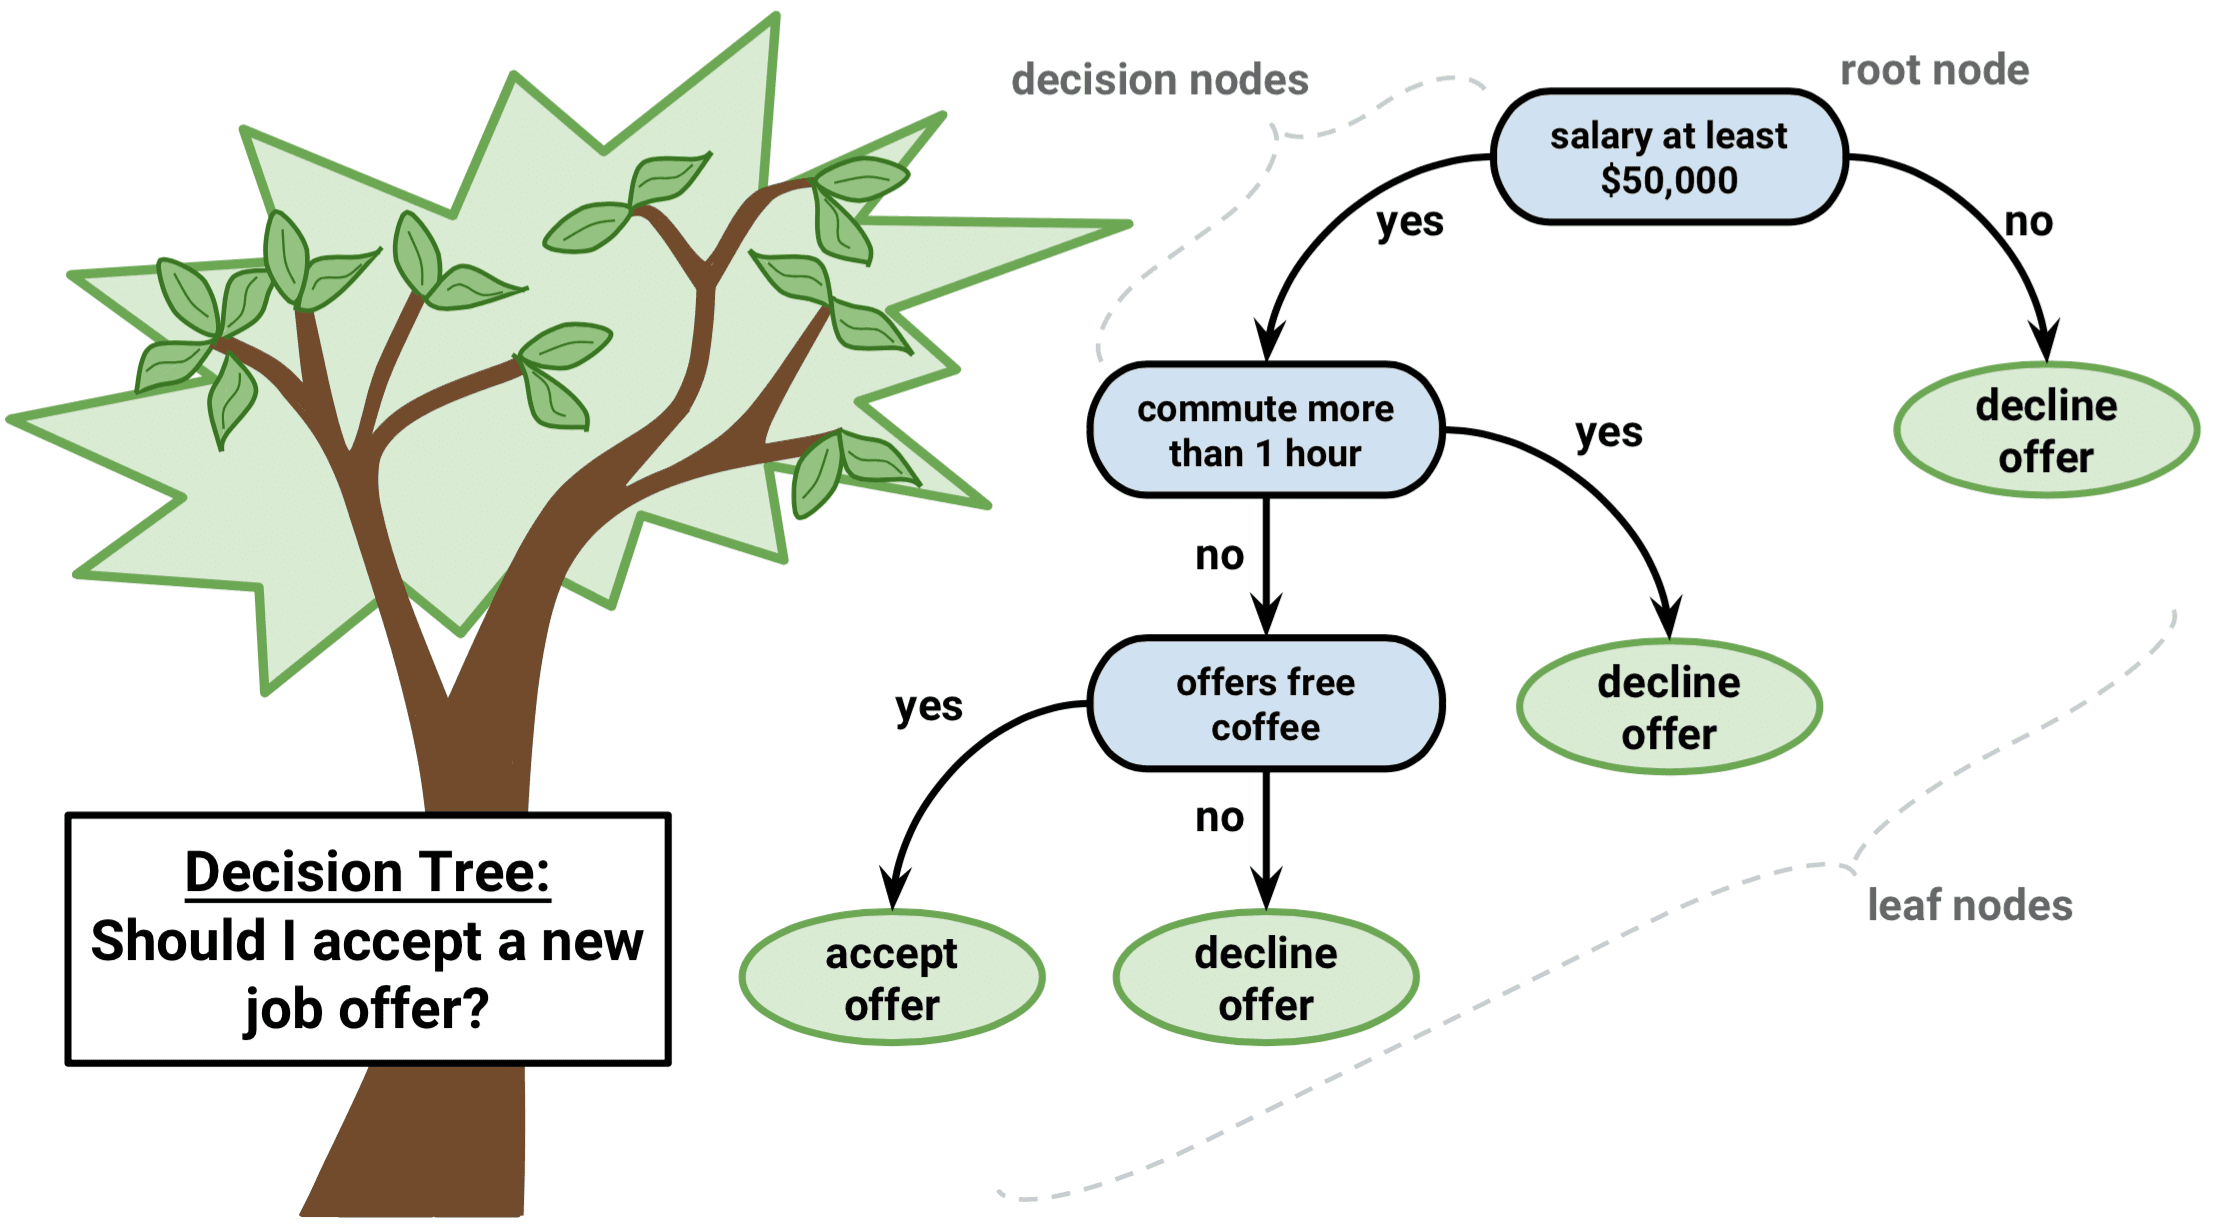
Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

- fixed acidity 
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data):
- quality (score between 0 and 10)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Wine_quality.xlsx')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Handlling Duplicate Values

In [5]:
df.duplicated().sum()

240

In [6]:
df = df.drop_duplicates()

In [7]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile_acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric_acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual_sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free_sulfur_dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total_sulfur_dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


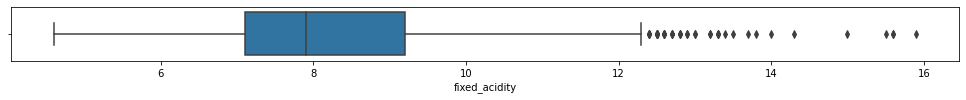

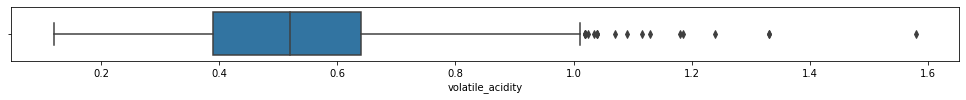

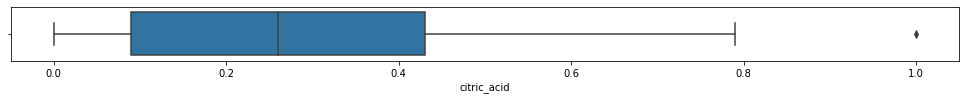

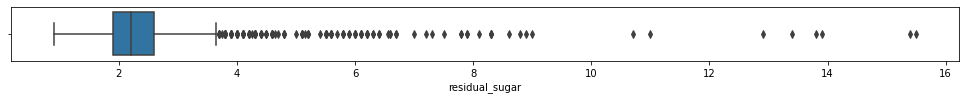

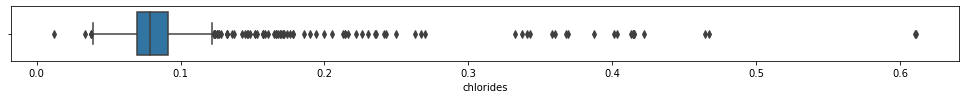

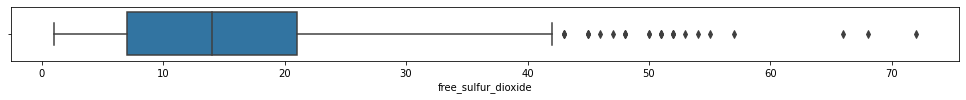

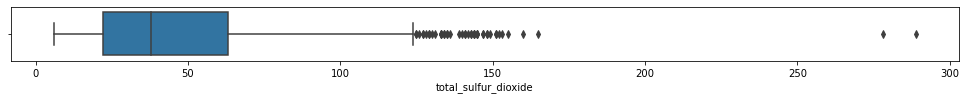

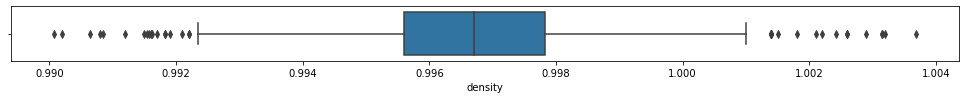

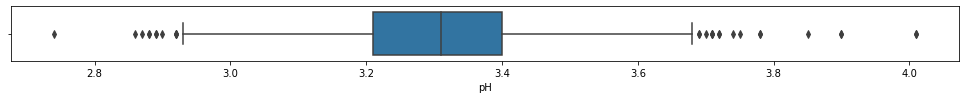

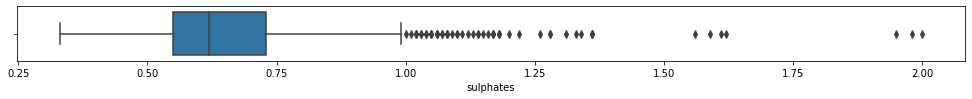

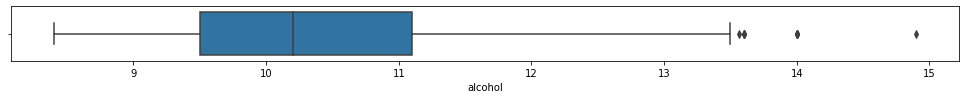

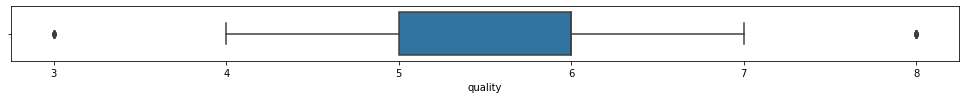

In [9]:
# fig, ax = plt.subplots(figsize=(15,10))
# sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


for column in df:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df, x=column)

## Data Vizualization

C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

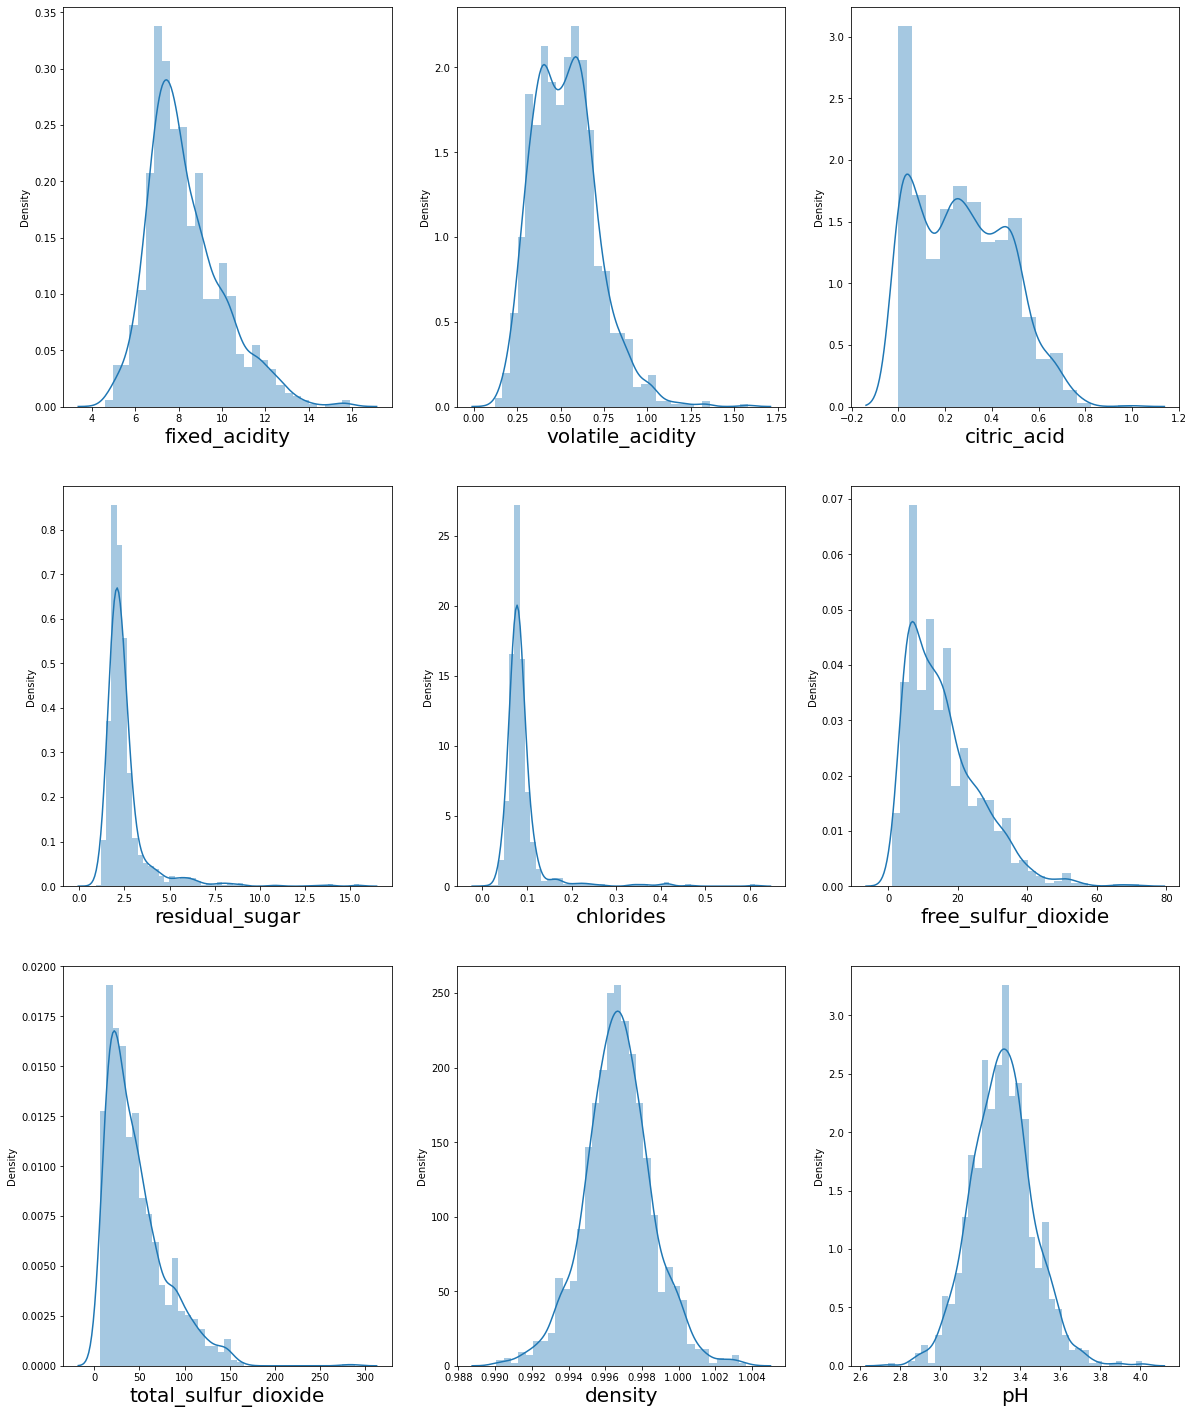

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Vizualizing the relationship between Input & Target Features

In [11]:
X = df.drop(columns = ['quality'])
y = df['quality']

C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thanmai

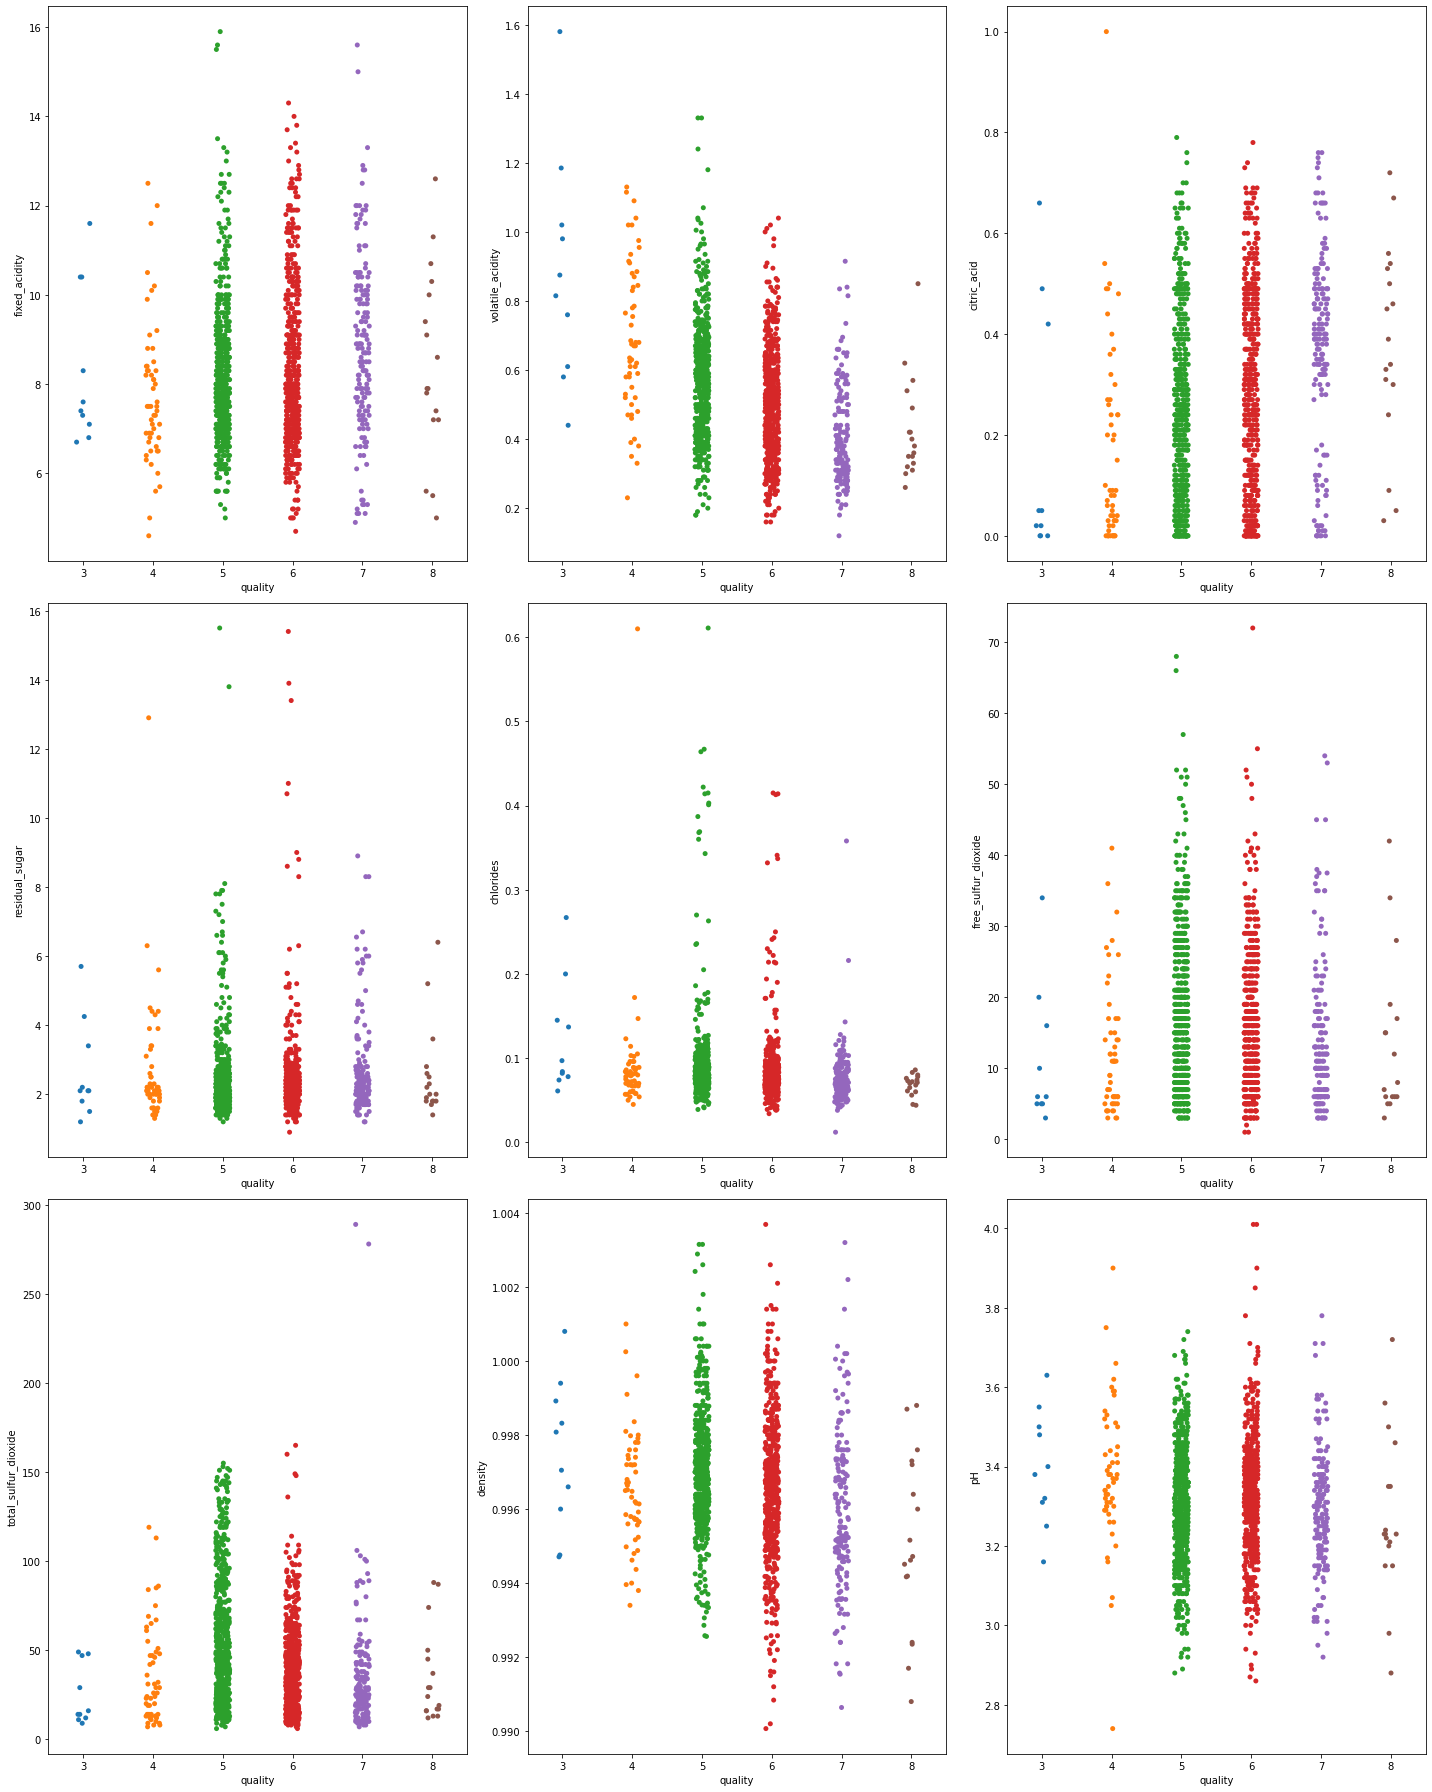

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

## Train Test Split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.90, random_state = 355)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

135 135
1224 1224


## Decision Tree Algorithm

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

 

Types of Decision Trees
Types of decision trees are based on the type of target variable we have. It can be of two types:

Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.
Example:- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (yes/ no). Here we know that the income of customers is a significant variable but the insurance company does not have income details for all customers. Now, as we know this is an important variable, then we can build a decision tree to predict customer income based on occupation, product, and various other variables. In this case, we are predicting values for the continuous variables.

 

Important Terminology related to Decision Trees
 

- Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
- Splitting: It is a process of dividing a node into two or more sub-nodes.
- Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.
- Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.
- Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
- Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.
- Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.
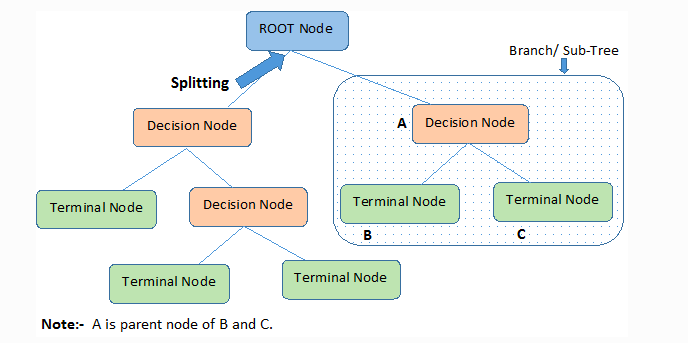
Decision trees classify the examples by sorting them down the tree from the root to some leaf/terminal node, with the leaf/terminal node providing the classification of the example.

Each node in the tree acts as a test case for some attribute, and each edge descending from the node corresponds to the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new node.


In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
model.score(X_train, y_train)

1.0

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.42810457516339867

Since train data accuracy is more than test data accuracy, the model is considered as over fitting model.

In almost any Machine Learning project, we train different models on the dataset and select the one with the best performance. However, there is room for improvement as we cannot say for sure that this particular model is best for the problem at hand. Hence, our aim is to improve the model in any way possible. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly. 

## Implementing GridSearchCV
GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. 

Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.So an important point here to note is that we need to have the Scikit learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

As mentioned above, we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take. Here is an example of it

 { 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf',’linear’,'sigmoid']  }
   
Here C, gamma and kernels are some of the hyperparameters of an SVM model. Note that the rest of the hyperparameters will be set to their default values

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

we shall see how to use GridSearchCV and also find out how it improves the performance of the model.

First, let us see what are the various arguments that are taken by GridSearchCV function:

sklearn.model_selection.GridSearchCV(estimator, param_grid,scoring=None,
          n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, 
          pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False) 
          
We are going to briefly describe a few of these parameters and the rest you can see on the original documentation:

1. estimator: Pass the model instance for which you want to check the hyperparameters.
2. params_grid: the dictionary object that holds the hyperparameters you want to try
3. scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
4. cv: number of cross-validation you have to try for each selected set of hyperparameters
5. verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6. n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. 

Now, let us see how to use GridSearchCV to improve the accuracy of our model. Here I am going to train the model twice, once without using GridsearchCV(using the default hyperparameters) and the other time we will use GridSearchCV to find the optimal values of hyperparameters for the dataset at hand. I am using the famous Breast Cancer Wisconsin (Diagnostic) Data Set which I am directly importing from the Scikit-learn library here.

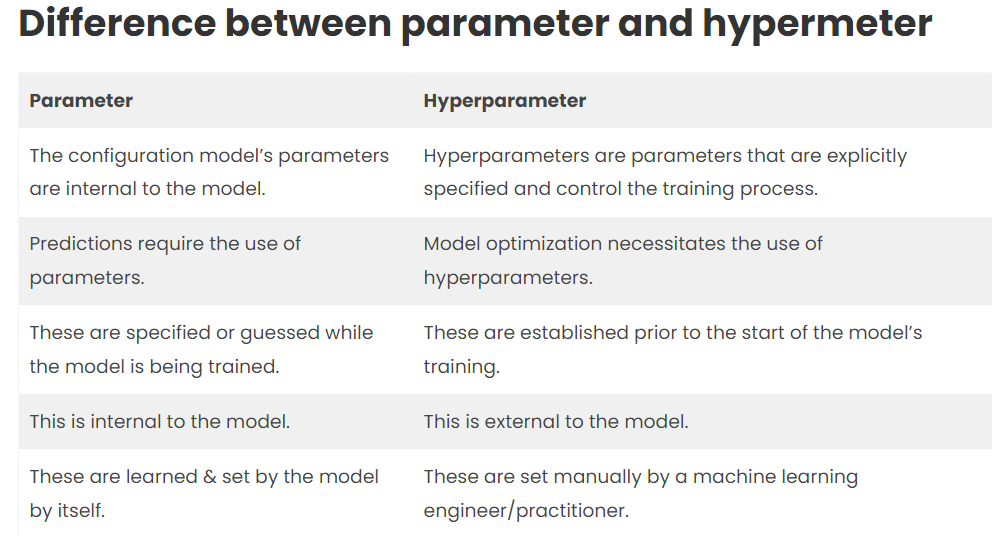

In [18]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [19]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid_param, cv = 5)

In [20]:
grid_search.fit(X_train, y_train)

C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [21]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 26,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'splitter': 'random'}

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_with_best_params = DecisionTreeClassifier(criterion = 'gini',
 max_depth= 4,
 min_samples_leaf= 7,
 min_samples_split= 2,
 splitter= 'random')

In [23]:
model_with_best_params.fit(X_train, y_train)
y_pred2 = model_with_best_params.predict(X_test)
accuracy_score(y_pred2, y_test)

0.5261437908496732

## Observation

The Accuracy Score of Decission Tree Classifier is 0.42 it increased to 0.52 after applying hyperparameter tuning using GridSearchCV.